In [1]:
%load_ext autoreload
%autoreload 2
import diverse_yeast_tools as dyt
import os
import pickle
import numpy as np
import pandas as pd
import json
import matplotlib as mpl
import matplotlib.pyplot as plt

base_dir = os.path.normpath('G:/My Drive/Crick_LMS/projects/diverse_yeasts/alphafold')

In [ ]:
## Ipath image of selected genes 

In [2]:
#Go from : G:\My Drive\Crick_LMS\projects\diverse_yeasts\alphafold\selected_proteins\og_metadata.json
#Make a dictionary to map to Uniprot Names
#Export list, see what is present in Ipath

#Load og_metadata (used to be called og_out_data_full)
og_fname = base_dir + os.sep + os.path.normpath('selected_proteins/og_metadata.json')
with open(og_fname, 'r') as f:
    og_metadata = json.load(f) 

model_gene_id_2_swissprot_id = dyt.load_model_gene_id_2_swissprot_id()
model_gene_swissprot_id_2_id = dyt.load_model_swissprot_id_2_gene_id()

#Load data for conservation
struct_analysis = pickle.load(open(base_dir + os.sep + os.path.normpath('Output/data/Analysis_new_02.pkl'), 'rb'))

## This should be a function or a csv
params_to_plot = ['Mean(Mapping rate)', 'Mean(Conservation rate AA)', 'Mean(Conservation rate Type)']

struct_data_to_plot = {}

for jj, (og_ref, struct_data) in enumerate(struct_analysis.items()): 
    og = og_ref.split('_')[0]
    struct_data_og = []
    for param in params_to_plot:
        struct_data_og.append(struct_data[param])
    struct_data_to_plot[jj] = [og, og_ref] + struct_data_og 
    
struct_data_to_plot_df = pd.DataFrame.from_dict(struct_data_to_plot, orient='index', columns = ['og', 'og_ref'] + params_to_plot )

#struct_data_to_plot_og_grouped = struct_data_to_plot_df.groupby('og').mean()


In [5]:
model_gene_id_2_swissprot_id['Scer']['YNR016C']

'Q00955'

In [4]:
struct_data_to_plot_df

,og,og_ref,Mean(Mapping rate),Mean(Conservation rate AA),Mean(Conservation rate Type)
0,OG4352,OG4352_REF_Scer_AF-P00127-F1-model_v2,0.515006,0.488312,0.583829
1,OG3208,OG3208_REF_Scer_AF-P00128-F1-model_v2,0.983085,0.577829,0.742639
2,OG1016,OG1016_REF_Scer_AF-P00330-F1-model_v2,0.954863,0.736954,0.817145
3,OG1016,OG1016_REF_Scer_AF-P00331-F1-model_v2,0.938285,0.737345,0.817970
4,OG1145,OG1145_REF_Scer_AF-P00358-F1-model_v2,0.994326,0.769694,0.856194
...,...,...,...,...,...
526,OG1589,OG1589_REF_Scer_AF-Q12680-F1-model_v2,0.933520,0.653170,0.744908
527,OG2765,OG2765_REF_Scer_AF-Q3E840-F1-model_v2,0.859512,0.633210,0.791702
528,OG2562,OG2562_REF_Scer_AF-Q99190-F1-model_v2,0.754167,0.473902,0.637396
529,OG2061,OG2061_REF_Scer_AF-Q99258-F1-model_v2,0.947771,0.608130,0.726445


In [6]:
#Make list of all sc orfs
sc_orfs_present_dupes = []

orf_to_og = {}
kept_og_list = []
for og, og_data in og_metadata.items():
    if og_data['pass_species_filter']:
        kept_og_list.append(og)
        for orf in og_data['sc_genes']:
            sc_orfs_present_dupes.append(orf)
            orf_to_og[orf] = og

sc_orfs_present = list(set(sc_orfs_present_dupes))

print(str(len(sc_orfs_present)) + ' orfs present in ' + str(len(kept_og_list)) + ' orthogroups')

#output file for Ipath
ipath_full_prot_list = base_dir + os.sep + os.path.normpath('selected_proteins/ipath/ipath_full_prot_list.txt')

with open(ipath_full_prot_list,'w') as f_out: 
    for orf in sc_orfs_present: 
        if orf in model_gene_id_2_swissprot_id['Scer'].keys():
            f_out.write('UNIPROT:'+model_gene_id_2_swissprot_id['Scer'][orf] + '\n')
        else: 
            print('No Uniprot ID for ' + orf)
    
#Load this text file into ipath tools.cgi
#Identifier valdidator, with Metabolic Pathways Checked, and Output only valid IDs set to NO
#Would be useful to see if the other selections have some of the missing genes
#
#Biosynthesis of secondary metabolites
#Microbial Metabolism in diverse environments
#Biosynthesis of antibiotics
#
#output saved as base_dir + os.sep + os.path.normpath('alphafold/selected_proteins/ipath/iPath_ID_validation_metabolic_20230201.txt')

534 orfs present in 426 orthogroups


In [7]:
#Use Ipath validation to identify the percentage of iPath3 Genes present in our orthogroups. 
#ipath3 genes present in all of S. cerevisiae 


#output file for Ipath
ipath_all_sc_uniprot = base_dir + os.sep + os.path.normpath('selected_proteins/ipath/ipath_all_sc_uniprot.txt')

with open(ipath_all_sc_uniprot,'w') as f_out: 
    for uniprot_id in model_gene_swissprot_id_2_id['Scer'].keys(): 
        if isinstance(uniprot_id, float): 
            assert np.isnan(uniprot_id)
        else: 
            f_out.write('UNIPROT:'+uniprot_id + '\n')
            
#Provide this file to ipath3 identifier validator at https://pathways.embl.de/tools.cgi
#check all maps and output valid and invalid ids (check no on 'output only valid IDs')

In [5]:
#Count total number of valid uniprot IDS from ipath metabolic map
ipath_map = 'metabolic'#'all'#'all' #metabolic

ipath_validation_all_uniprot = pd.read_table(base_dir + os.sep + os.path.normpath('selected_proteins/ipath/iPath_ID_validation_' + ipath_map +'_uniprot.txt'), header=None)
ipath_validation_all_uniprot.rename(columns={0:'ID', 1:'valid'}, inplace=True)

valid_ID_list_all_uniprot = ipath_validation_all_uniprot[ipath_validation_all_uniprot['valid']=='VALID']
print(str(len(valid_ID_list_all_uniprot)) + ' Uniprot IDs present in ipath3 Metabolic Map')

#Count total number of valid Uniprot IDs from our orthogroup data

#Count total number of valid uniprot IDS from ipath metabolic map
ipath_validation = pd.read_table(base_dir + os.sep + os.path.normpath('selected_proteins/ipath/iPath_ID_validation_' + ipath_map + '.txt'), header=None)
ipath_validation.rename(columns={0:'ID', 1:'valid'}, inplace=True)

valid_ID_list = ipath_validation[ipath_validation['valid']=='VALID']
print(str(len(valid_ID_list)) + ' Uniprot IDs present ipath3 ' + ipath_map + ' maps for our orthogroups')

print('{:%}'.format(len(valid_ID_list)/len(valid_ID_list_all_uniprot)))

717 Uniprot IDs present in ipath3 Metabolic Map
450 Uniprot IDs present ipath3 metabolic maps for our orthogroups
62.761506%


In [45]:
#There were 38 proteins that were missing from my original pathway database because I used Gene.pathways.name instead of Pathway ID
#Import yeastmine annotations summary and identify genes that are missing from this pathway.  

sc_annotations = pd.read_csv(base_dir + os.sep + os.path.normpath('selected_proteins/annotation/yeastmine_annotation_summary_20211007.csv'))

#how many pathways have a 'Pathway ID' but not a 'Gene.pathways.name'?
pathway_id = ~(sc_annotations['Pathway ID'].isna())
gene_pathways_name = ~(sc_annotations['Gene.pathways.name']=='[]')

print('There were {} genes that had a Pathway ID but not a Gene.pathways.name ID'.format(sum(pathway_id & (~gene_pathways_name))))

print('There were {} genes that had a Gene.pathways.name ID but not a Pathway ID'.format(sum(gene_pathways_name & (~pathway_id))))

sc_annotations[(pathway_id & (~gene_pathways_name))].to_csv(base_dir + os.sep + os.path.normpath('selected_proteins/annotation/Pathway_ID_but_no_Gene_pathways_name.csv'))



There were 38 genes that had a Pathway ID but not a Gene.pathways.name ID
There were 0 genes that had a Gene.pathways.name ID but not a Pathway ID


In [63]:
#Some that weren't listed at all in the pathways Database but were listed in the Ipath Database

#Get Ipath Gene List
ipath_all_gene_list = []
for uniprot_id in valid_ID_list_all_uniprot['ID']:
    uniprot_id_clean = uniprot_id.split(':')[1]
    try: 
        ipath_gene = model_gene_swissprot_id_2_id['Scer'][uniprot_id_clean]
    except KeyError: 
        print('No gene mapped to uniprot id ' + uniprot_id_clean)
        ipath_gene = None
    ipath_all_gene_list.append(ipath_gene)

#Get Ipath Gene List present
ipath_gene_list = []
for uniprot_id in valid_ID_list['ID']:
    uniprot_id_clean = uniprot_id.split(':')[1]
    try: 
        ipath_gene = model_gene_swissprot_id_2_id['Scer'][uniprot_id_clean]
    except KeyError: 
        print('No gene mapped to uniprot id ' + uniprot_id_clean)
        ipath_gene = None
    ipath_gene_list.append(ipath_gene)

#Pathways gene list from SGD yeastmine query also was missing genes
#pathway_table = pd.read_table(base_dir + os.sep + os.path.normpath('selected_proteins/pathways/pathways_tab_20231122.tsv'), names=['pathway_name','pathway_id','common_name','genename','enzyme_name'])
genes_in_pathways_db = sc_annotations[pathway_id]['Unnamed: 0']

print(str(len(set(ipath_all_gene_list) - set(genes_in_pathways_db))) + ' genes in Ipath but not in yeast pathways database')



243 genes in Ipath but not in yeast pathways database
30 ipath genes could have been missed out because of sgd data error


In [69]:
#How many in Ipath were filtered out? 

#Make list of all sc OGs that were filtered out
sc_orfs_filtered_dupes = []

orf_to_og = {}
filtered_og_list = []
for og, og_data in og_metadata.items():
    if not(og_data['pass_species_filter']):
        filtered_og_list.append(og)
        for orf in og_data['sc_genes']:
            sc_orfs_filtered_dupes.append(orf)
            orf_to_og[orf] = og

sc_orfs_filtered = list(set(sc_orfs_filtered_dupes))


print(str(len(sc_orfs_filtered)) + " filtered out")

print(str(len(set(sc_orfs_filtered) & set(ipath_all_gene_list))) + " of those filtered were in the Ipath Dataset")

set(sc_orfs_filtered) & set(ipath_all_gene_list)

20 filtered out
16 of those filtered were in the Ipath Dataset


{'Q0045',
 'Q0105',
 'Q0115',
 'Q0250',
 'Q0275',
 'YBR252W',
 'YDR147W',
 'YDR441C',
 'YGL256W',
 'YGR180C',
 'YHL012W',
 'YKL216W',
 'YNR057C',
 'YNR058W',
 'YOL126C',
 'YOR221C'}

In [74]:
#How many ipath genes are not in the pathways database, but were added on as extra orthologs in the end

print(str(len((set(ipath_all_gene_list) - set(genes_in_pathways_db) ) & set(ipath_gene_list))) + ' ipath genes not in the pathways database but added on as extra orthologs')

(set(ipath_all_gene_list) - set(genes_in_pathways_db) ) & set(ipath_gene_list)

20 ipath genes not in the pathways database but added on as extra orthologs


{'YBR001C',
 'YDL246C',
 'YDR009W',
 'YDR111C',
 'YDR516C',
 'YFL058W',
 'YGR043C',
 'YHR033W',
 'YIL111W',
 'YJR156C',
 'YJR159W',
 'YLL058W',
 'YLR164W',
 'YML082W',
 'YMR118C',
 'YMR323W',
 'YNL332W',
 'YOL068C',
 'YOR393W',
 'YPL281C'}

In [79]:
#How many ipath genes are in the pathways database, but we lost them because of the data error

print(str(len(set(ipath_all_gene_list) & set(sc_annotations[(pathway_id & (~gene_pathways_name))]['Unnamed: 0']))) + ' ipath genes could have been missed out because of sgd data error')

print(str(len((set(ipath_all_gene_list)-set(ipath_gene_list)) & set(sc_annotations[(pathway_id & (~gene_pathways_name))]['Unnamed: 0']))) + ' genes actually missed out because of sgd data error')

#That leaves 
#717 total Ipath Genes
#- 243 ipath genes not in pathway 
#+ 20 ipath genes added back because of paralogs that got included in the set of genes 
#- 16 genes (of the 20 orthogroups filtered out which didn't have enough species)
#- 29 genes which weren't included in the initial dataset because of the SGD database error
#= 449 
#
#This should be 450 - I wonder which one is missing??

30 ipath genes could have been missed out because of sgd data error
29 genes actually missed out because of sgd data error


In [40]:
#Is the old list the same as the new list: 
print(len(set(pathway_table['genename']) - set(sc_annotations[gene_pathways_name]['Unnamed: 0'])))
print(len(set(sc_annotations[gene_pathways_name]['Unnamed: 0']) - set(pathway_table['genename'])))
#Yes - it is an empty set both directions

0
0


In [ ]:
### ipath validation needs to be run on revised input. 

In [4]:
#for metmap_type in ['metabolic','biosynth','diverseenvironments', 'antibiotics']:

ipath_validation = pd.read_table(base_dir + os.sep + os.path.normpath('selected_proteins/ipath/iPath_ID_validation_' + 'metabolic' + '_20230202.txt'), header=None)
ipath_validation.rename(columns={0:'ID', 1:'valid'}, inplace=True)

valid_ID_list = ipath_validation[ipath_validation['valid']=='VALID']
print(str(len(valid_ID_list)) + ' Uniprot IDs present in ipath3 Metabolic Map')

450 Uniprot IDs present in ipath3 Metabolic Map


In [7]:
ipath_map_all = base_dir + os.sep + os.path.normpath('selected_proteins/ipath/ipath_input_present.txt')
color = '#8112BD'
width = 'W15'
with open(ipath_map_all,'w') as f_out: 
    for ind, (uniprot_id, valid) in valid_ID_list.iterrows():
        f_out.write(uniprot_id + ' ' + color + ' ' + width + '\n' )

In [28]:
ipath_map_all = base_dir + os.sep + os.path.normpath('selected_proteins/ipath/ipath_input_cons.txt')
#color = '#8112BD'

#Width
n_width_bins = 10
baseline_width = 4
bins = np.linspace(min_cons, max_cons, num=n_width_bins)
struct_data_to_plot_og_grouped['width_bins'] = np.digitize(struct_data_to_plot_og_grouped['Mean(Conservation rate AA)'], bins=bins)

#Color

#Bracket color by min and max of valid ID list
cons_rate_vals = []
for ind, (uniprot_id, valid) in valid_ID_list.iterrows():
    orf = model_gene_swissprot_id_2_id['Scer'][uniprot_id.split(':')[1]]
    og = orf_to_og[orf]
    if og in struct_data_to_plot_og_grouped.index:
        cons_rate_vals.append(struct_data_to_plot_og_grouped.loc[og, 'Mean(Conservation rate AA)'])

min_cons = min(cons_rate_vals)
max_cons = max(cons_rate_vals)       
norm = mpl.colors.Normalize(vmin=min_cons, vmax=max_cons)
cmap = mpl.cm.viridis_r
cmap_function = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

colorvals_norm = []

with open(ipath_map_all,'w') as f_out: 
    for ind, (uniprot_id, valid) in valid_ID_list.iterrows():
        orf = model_gene_swissprot_id_2_id['Scer'][uniprot_id.split(':')[1]]
        og = orf_to_og[orf]
        if og in struct_data_to_plot_og_grouped.index:
            width = struct_data_to_plot_og_grouped.loc[og, 'width_bins'] + baseline_width
            color = mpl.colors.to_hex(cmap_function.to_rgba(struct_data_to_plot_og_grouped.loc[og, 'Mean(Conservation rate AA)']))
            f_out.write(uniprot_id + ' ' + color + ' W' + str(width) + '\n' )
        else: 
            print(og+ ' from ' + orf + ' not present with conservation data')

OG1710 from YMR207C not present with conservation data
OG1710 from YNR016C not present with conservation data


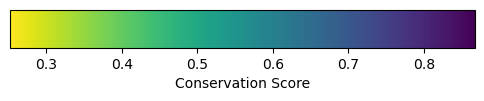

In [30]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)


fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='Conservation Score')

fig.savefig(base_dir + os.sep + os.path.normpath('selected_proteins/ipath/ipath_input_cons_colorbar.svg'))